<a href="https://colab.research.google.com/github/ng328/ML_Projects/blob/main/cat_vs_dog_nkg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
#pip install -q kaggle

#create a kaggle folde
!mkdir -p ~/.kaggle

In [1]:
!git clone https://github.com/ng328/ML_Projects.git

Cloning into 'ML_Projects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
#copy the kaggle.jsonto folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#for uploading files--
#from google.colab import files
#files.upload()

In [ ]:
#permission for json to act
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#Create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 80s 108ms/step - loss: 1.2376 - accuracy: 0.5986 - val_loss: 0.6241 - val_accuracy: 0.6474
Epoch 2/15
625/625 [==============================] - 69s 109ms/step - loss: 0.5586 - accuracy: 0.7115 - val_loss: 0.7624 - val_accuracy: 0.6046
Epoch 3/15
625/625 [==============================] - 69s 109ms/step - loss: 0.4739 - accuracy: 0.7752 - val_loss: 0.7579 - val_accuracy: 0.7186
Epoch 4/15
625/625 [==============================] - 68s 109ms/step - loss: 0.4095 - accuracy: 0.8125 - val_loss: 0.6058 - val_accuracy: 0.7324
Epoch 5/15
625/625 [==============================] - 66s 106ms/step - loss: 0.3586 - accuracy: 0.8424 - val_loss: 0.8312 - val_accuracy: 0.6290
Epoch 6/15
625/625 [==============================] - 67s 107ms/step - loss: 0.2837 - accuracy: 0.8780 - val_loss: 0.5163 - val_accuracy: 0.7960
Epoch 7/15
625/625 [==============================] - 68s 109ms/step - loss: 0.2185 - accuracy: 0.9104 - val_loss: 0.5065 - val_ac

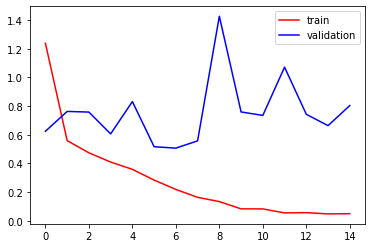

In [ ]:
import matplotlib.pyplot as plt  #old
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img1=cv2.imread("/content/dogs_vs_cats/cat.jpg")

In [ ]:
test_img1.shape

(453, 380, 3)

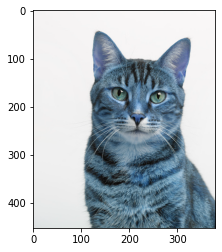

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img_result=cv2.resize(test_img1,(256,256))

In [ ]:
test_input=test_img_result.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 252ms/step


array([[0.]], dtype=float32)

In [ ]:
import cv2
test_img2=cv2.imread('/content/dogs_vs_cats/download.jpeg')

In [ ]:
test_img2.shape

(194, 259, 3)

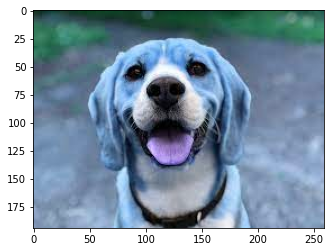

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2_result=cv2.resize(test_img2,(256,256))

In [ ]:
test_input1=test_img2_result.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 61ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img3=cv2.imread('/content/dogs_vs_cats/dog2.jpeg')
test_img3.shape


(168, 299, 3)

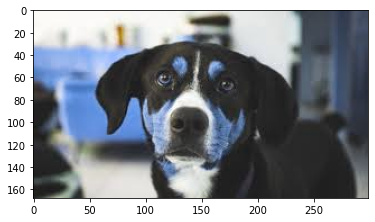

In [ ]:
plt.imshow(test_img3)

In [ ]:
test_img3_result=cv2.resize(test_img3,(256,256))


In [ ]:
test_input2=test_img3_result.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img4=cv2.imread('/content/dogs_vs_cats/cat2.jpeg')
test_img4.shape

(194, 259, 3)

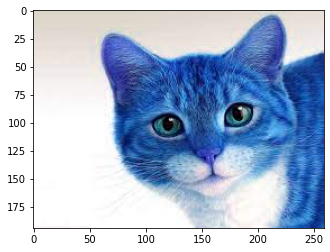

In [ ]:
plt.imshow(test_img4)

In [ ]:
test_img4_result=cv2.resize(test_img4,(256,256))

In [ ]:
test_input3=test_img4_result.reshape((1,256,256,3))

In [ ]:
model.predict(test_input3)

1/1 [==============================] - 0s 42ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img5=cv2.imread('/content/dogs_vs_cats/cat4.jpeg')
test_img5.shape

(168, 299, 3)

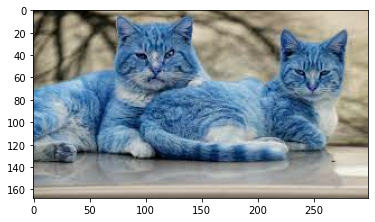

In [ ]:
plt.imshow(test_img5)

In [ ]:
test_img5_result=cv2.resize(test_img5,(256,256))

In [ ]:
test_input4=test_img5_result.reshape((1,256,256,3))

In [ ]:
model.predict(test_input4)

1/1 [==============================] - 0s 23ms/step


array([[0.886636]], dtype=float32)

In [ ]:
test_img6=cv2.imread('/content/dogs_vs_cats/cat$dog.jpg')
test_img6.shape

(612, 612, 3)

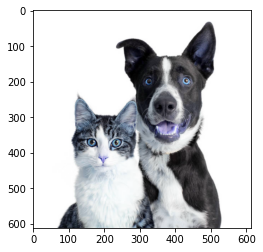

In [ ]:
plt.imshow(test_img6)

In [ ]:
test_img6_result=cv2.resize(test_img6,(256,256))

In [ ]:
test_input6=test_img6_result.reshape((1,256,256,3))

In [ ]:
model.predict(test_input6)

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)